In [1]:
#import the library
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.stats import reciprocal
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
import math

np.random.seed(5)


In [2]:
#read and peek into the data
df=pd.read_csv('thesis_sample_100_shuffled_w_respect_to_id_Model_B.csv')
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   case_id              7100 non-null   int64  
 1   Experiment ID        7100 non-null   int64  
 2   Date Time            7100 non-null   object 
 3   time                 7100 non-null   int64  
 4   Gas Inje Cum SCTR    7100 non-null   float64
 5   cum_co2              7100 non-null   float64
 6   Water Prod Cum SCTR  7100 non-null   float64
 7   cum_brine            7100 non-null   float64
 8   i_inj                7100 non-null   int64  
 9   j_inj                7100 non-null   int64  
 10  i_pro                7100 non-null   int64  
 11  j_pro                7100 non-null   int64  
 12  k                    7100 non-null   int64  
 13  ijk_inj              7100 non-null   object 
 14  ijk_pro              7100 non-null   object 
 15  distance             7100 non-null   f

,case_id,Experiment ID,time,Gas Inje Cum SCTR,cum_co2,Water Prod Cum SCTR,cum_brine,i_inj,j_inj,i_pro,j_pro,k,distance,min_distance_inj,perm_x_por_inj_sum,perm_x_por_pro_sum
count,7100.000000,7100.000000,7100.000000,7.100000e+03,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.0,7100.000000,7100.000000,7100.000000,7100.000000
mean,50.500000,372.220000,1095.492958,5.065765e+07,0.050658,117684.886631,0.117685,49.340000,88.060000,44.030000,91.250000,1.0,52.885670,13.504821,241.226578,255.464847
std,28.868103,215.827413,623.816256,3.127186e+07,0.031272,103635.381933,0.103635,22.006649,32.304232,21.871362,34.052178,0.0,29.367113,9.303333,84.537658,85.757374
min,1.000000,30.000000,31.000000,1.000352e+06,0.001000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,5.099020,0.000000,41.106744,38.693733
25%,25.750000,176.500000,547.000000,2.445799e+07,0.024458,26708.427500,0.026708,34.000000,65.750000,26.750000,65.750000,1.0,29.778197,5.719505,191.891692,186.794188
50%,50.500000,365.500000,1096.000000,4.346827e+07,0.043468,91441.910000,0.091442,49.500000,92.500000,44.000000,97.500000,1.0,50.273392,12.369317,237.649280,249.030183
75%,75.250000,586.000000,1643.000000,6.921627e+07,0.069216,178301.985000,0.178302,68.000000,113.250000,61.250000,117.000000,1.0,69.094047,21.112237,299.515862,321.282894
max,100.000000,716.000000,2161.000000,1.680000e+08,0.168000,526227.380000,0.526227,95.000000,152.000000,95.000000,152.000000,1.0,159.062881,35.777088,394.800930,427.480096


In [3]:
#this converts the panda dataframe into ndarray using function to_numpy
x=df[['i_inj','j_inj','i_pro','j_pro','time',
      'perm_x_por_inj_sum','perm_x_por_pro_sum',
      'min_distance_inj','distance']].to_numpy() 

#same as above converted to nd array using to_numpy function
y=df[['cum_co2']].to_numpy() 

pd.DataFrame(x).describe(),pd.DataFrame(y).describe()

(                 0            1            2            3            4  \
 count  7100.000000  7100.000000  7100.000000  7100.000000  7100.000000   
 mean     49.340000    88.060000    44.030000    91.250000  1095.492958   
 std      22.006649    32.304232    21.871362    34.052178   623.816256   
 min       1.000000     1.000000     1.000000     1.000000    31.000000   
 25%      34.000000    65.750000    26.750000    65.750000   547.000000   
 50%      49.500000    92.500000    44.000000    97.500000  1096.000000   
 75%      68.000000   113.250000    61.250000   117.000000  1643.000000   
 max      95.000000   152.000000    95.000000   152.000000  2161.000000   
 
                  5            6            7            8  
 count  7100.000000  7100.000000  7100.000000  7100.000000  
 mean    241.226578   255.464847    13.504821    52.885670  
 std      84.537658    85.757374     9.303333    29.367113  
 min      41.106744    38.693733     0.000000     5.099020  
 25%     191.89169

In [4]:
#scale the training data
scaler=MinMaxScaler()
train_data=scaler.fit_transform(x) # it is important to fit the scaler into training set only
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,0.514255,0.576556,0.457766,0.597682,0.499762,0.565799,0.557558,0.377471,0.310376
std,0.234113,0.213935,0.232674,0.225511,0.292871,0.239013,0.220577,0.260036,0.190740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.351064,0.428808,0.273936,0.428808,0.242254,0.426314,0.380930,0.159865,0.160292
50%,0.515957,0.605960,0.457447,0.639073,0.500000,0.555685,0.541008,0.345733,0.293409
75%,0.712766,0.743377,0.640957,0.768212,0.756808,0.730600,0.726849,0.590105,0.415650
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_targets=y

pd.DataFrame(train_targets).describe()

,0
count,7100.000000
mean,0.050658
std,0.031272
min,0.001000
25%,0.024458
50%,0.043468
75%,0.069216
max,0.168000


In [6]:
def converter(params):
    #convert the best solution into a layer sizes, integer values from floats
    # transform the layer sizes from float (possibly negative) values into hiddenLayerSizes tuple:
    if round(params[1]) <= 9:
        hiddenLayerSizes = round(params[0]),
    elif round(params[2]) <= 9:
        hiddenLayerSizes = (round(params[0]), round(params[1]))
    elif round(params[3]) <= 9:
        hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]))
    elif round(params[4]) <= 9:
        hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]), round(params[3]))
    else :
        hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]), round(params[3]), 
                            round(params[4]))

    return hiddenLayerSizes

In [15]:
def build_model(individuals):
    # transform the layer sizes from float (possibly negative) values into hiddenLayerSizes tuple:
    hiddenLayerSizes=converter(individuals)
    #print (hiddenLayerSizes,len(hiddenLayerSizes))
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(hiddenLayerSizes[0],input_dim=train_data.shape[1],activation='relu'))
    
    
    if len(hiddenLayerSizes)>1:
        for i in range(len(hiddenLayerSizes)-1):
            model.add(keras.layers.Dense(hiddenLayerSizes[i+1],activation='relu')) #hidden layer generator loop
    else:
        pass

        
    learning_rate=1e-3
    #print (learning_rate)

    
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'],
                  optimizer=tf.keras.optimizers.Adam(learning_rate))  
    
    #model.summary()
    
    return model

In [18]:
def ind_round_generator(params):
    rounded_ind = (converter(params))
    return rounded_ind

In [20]:
def k_fold_validation(individual):

    num_epochs = 20
    k = 4
    num_val_samples = len(train_data) // k
    #print('num_val_samples:',num_val_samples)
    all_scores = [] 
    
    batch_size=32
    #rint ('batch_size',batch_size)
    
    for i in range(k):
        #print(f"Processing fold #{i}")    
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]     
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]    
        partial_train_data = np.concatenate([train_data[:i * num_val_samples],         
                                                 train_data[(i + 1) * num_val_samples:]],axis=0)    
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],         
                                                    train_targets[(i + 1) * num_val_samples:]],axis=0)   
        
        model = build_model(individual)
    
        history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=None)  
        
        val_mae_loss, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        
    f=np.mean(all_scores)
    
    return f

The process began
gen	nevals	min       	avg      
0  	30    	0.00862699	0.0123497
Processing gen #1
1  	24    	0.00841853	0.0109514
# of layers: 5 best_individual (99, 69, 25, 11, 38) Fitness (0.008626986993476748,)
Processing gen #2
2  	24    	0.00748842	0.0100926
# of layers: 5 best_individual (99, 69, 28, 10, 38) Fitness (0.008418531622737646,)
Processing gen #3
3  	28    	0.00748842	0.00946787
# of layers: 5 best_individual (99, 69, 25, 29, 38) Fitness (0.007488423143513501,)
Processing gen #4
4  	25    	0.00748842	0.00899168
# of layers: 5 best_individual (99, 69, 25, 29, 38) Fitness (0.007488423143513501,)
Processing gen #5
5  	28    	0.00748842	0.00895678
# of layers: 5 best_individual (99, 69, 25, 29, 38) Fitness (0.007488423143513501,)
Processing gen #6
6  	21    	0.00748842	0.00859134
# of layers: 5 best_individual (99, 69, 25, 29, 38) Fitness (0.007488423143513501,)
Processing gen #7
7  	25    	0.00744906	0.00833066
# of layers: 5 best_individual (99, 69, 25, 29, 38) Fitness

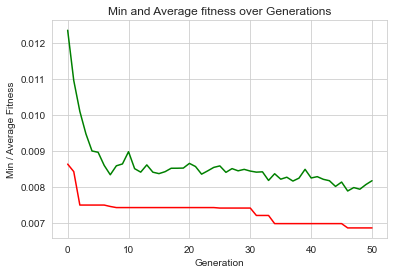

In [23]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    print('The process began')
    
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)
    
    #iterator is required to iterate in elements of tuple logbook.select("max")
    iterator=0
    #create a numpy array for later use as container and write best individuals to csv file
    all_in_one=np.zeros([1,7])
    
    
    # Begin the generational process
    for gen in range(1, ngen + 1):
        
        print(f"Processing gen #{gen}") 
            
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)
            
        #loop is for printing out the best ind and fitness values of each generation
        for ind in population:
           
            if ind.fitness.values==logbook.select("min")[iterator]: 
                print('# of layers:',len(ind_round_generator(ind)),'best_individual',ind_round_generator(ind),
                      'Fitness',ind.fitness.values)
                tuple1=tuple(ind) #convert individual into tuple
                tuple2=tuple(ind.fitness.values) #convert individual fitness into tuple
                tuple3=(gen-1,)+tuple1+tuple2
                #combine generation, individual, fitnesses into one tuple
                to_array=np.asarray(tuple3)  #convert combined tuple into an array
                reshaped=np.reshape(to_array,(1,7)) #reshape array
                all_in_one=np.append(all_in_one,reshaped,axis=0) #add new values in a new row using axis=0 option
                break #do not output all ind with highest fitness value
        iterator+=1
    
    return population, logbook


# boundaries for layer size parameters: 
             # [0,     1     2,     3     4     5      
BOUNDS_LOW =  [   10,    0,   -20,  -50,  -100 ]
              
BOUNDS_HIGH = [   100,  100,  100,   100,  100]


NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 2
CROWDING_FACTOR = 10.0  # crowding factor for crossover and mutation

# set the random seed:
RANDOM_SEED = 44
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax_tuning_model_b", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual_tuning_model_b", list, 
               fitness=creator.FitnessMax_tuning_model_b)

# define the layer_size_attributes individually:
for i in range(NUM_OF_PARAMS):
    # "layer_size_attribute_0", "layer_size_attribute_1", ...
    toolbox.register("layer_size_attribute_" + str(i),
                     random.uniform,
                     BOUNDS_LOW[i],
                     BOUNDS_HIGH[i])

# create a tuple containing an layer_size_attribute generator for each hidden layer:
layer_size_attributes = ()
for i in range(NUM_OF_PARAMS):
    layer_size_attributes = layer_size_attributes + \
                            (toolbox.__getattribute__("layer_size_attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator",
                 tools.initCycle,
                 creator.Individual_tuning_model_b,
                 layer_size_attributes,
                 n=1)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)


# fitness calculation
def accuracy(individual):
    fitness=k_fold_validation(individual)
    #print (type(fitness))
    return fitness,


toolbox.register("evaluate", accuracy)

# genetic operators:mutFlipBit

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate",
                 tools.cxSimulatedBinaryBounded,
                 low=BOUNDS_LOW,
                 up=BOUNDS_HIGH,
                 eta=CROWDING_FACTOR)

toolbox.register("mutate",
                 tools.mutPolynomialBounded,
                 low=BOUNDS_LOW,
                 up=BOUNDS_HIGH,
                 eta=CROWDING_FACTOR,
                 indpb=1.0/NUM_OF_PARAMS)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = eaSimpleWithElitism(population,
                                                      toolbox,
                                                      cxpb=P_CROSSOVER,
                                                      mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS,
                                                      stats=stats,
                                                      halloffame=hof,
                                                      verbose=True)
    #print all of the best solutions found:    
       
    print("- GA Best solution before converting is: ",hof.items[0],",loss is:", hof.items[0].fitness.values[0])
    print("- GA Best solution after converting - Layers and unit numbers: ",converter(hof.items[0]),
          ", Loss = ", hof.items[0].fitness.values[0])

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()

#execute the function
main()